In [2]:
import pandas as pd
import os
import numpy as np
import simpledbf
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Base de ingresos de la ciudad de buenos aires 2010

In [3]:
dbf = simpledbf.Dbf5('data/BaseEAH2010/EAH10_BU_IND_VERSION2.dbf')
data10 = dbf.to_dataframe()

In [4]:
(data10.ITFB == 9999999).sum()

6143

In [5]:
data10 = data10.loc[data10.ITFB != 9999999,['ID','COMUNA','FEXP','ITFB']]
#data10repe = data10.loc[:,['ID','COMUNA','FEXP','INGTOT','ITFB']]
print data10.shape
data10.head()

(10843, 4)


,ID,COMUNA,FEXP,ITFB
0,1,1,130.7693,400
1,1,1,130.7693,400
2,1,1,130.7693,400
3,1,1,130.7693,400
4,2,1,47.0046,2000


In [6]:
data10.drop_duplicates(inplace = True)
print data10.shape

(4449, 4)


In [7]:
print(data10.ITFB == 0).sum()
data10.ITFB.replace(to_replace=[0], value=[1] , inplace=True, axis=None)
print (data10.ITFB == 0).sum()

46
0


In [8]:
data10['lnIncome'] = np.log(data10.ITFB)

In [9]:
print type(data10.index.values[0]),type(data10.FEXP[0])

<type 'numpy.int64'> <type 'numpy.float64'>


In [10]:
data10.FEXP = data10.FEXP.astype(int)

In [11]:
data10exp = data10.loc[np.repeat(data10.index.values,data10.FEXP)]


In [12]:
data10exp.lnIncome.groupby(by=data10exp.COMUNA).mean().sort_values()

COMUNA
8     7.565635
1     7.837654
4     7.912230
12    8.043669
10    8.044518
3     8.052529
7     8.083813
9     8.122232
15    8.136962
13    8.215712
14    8.216385
5     8.239378
6     8.263870
11    8.283765
2     8.432181
Name: lnIncome, dtype: float64

In [13]:
data10.ITFB.groupby(by=data10.COMUNA).mean()

COMUNA
1     3634.447034
2     6512.264228
3     4395.164865
4     3655.127764
5     4916.963696
6     5798.725275
7     4507.372781
8     2836.487952
9     4316.655290
10    4067.532468
11    5449.662835
12    4644.552764
13    5903.435185
14    6015.775100
15    4692.528958
Name: ITFB, dtype: float64

In [14]:
data10exp.ITFB.groupby(by=data10exp.COMUNA).mean()

COMUNA
1     3806.762807
2     6933.011914
3     4301.447851
4     3869.557112
5     5070.870747
6     5603.396225
7     4575.618845
8     2800.941981
9     4667.634219
10    4103.096635
11    5515.926401
12    4720.418917
13    6103.743836
14    6204.832037
15    4843.879949
Name: ITFB, dtype: float64

# CENSO

In [16]:
def readRedatamCSV(asciiFile):
    f = open(asciiFile, 'r')
    areas = []
    measures = []
    for line in f:
        columns = line.strip().split()
        #print columns
        if len(columns) > 0:
            if 'RESUMEN' in columns[0] :
                break
            elif columns[0] == 'AREA':
                area = str.split(columns[2],',')[0]
                areas.append(area)
            elif columns[0] == 'Total':
                measure = str.split(columns[2],',')[2]
                measures.append(measure)
    try:        
        data = pd.DataFrame({'area':areas,'measure':measures})
        return data
    except:
        print asciiFile

def R2(dataset,real,predicted):
    plt.scatter(dataset[predicted],dataset[real])
    return ((dataset[real] - dataset[predicted])**2).sum() / ((dataset[real] - dataset[real].mean())**2).sum()

In [17]:
archivo = 'data/indecOnline/headEduc/comunas.csv'
ingresoXComuna = readRedatamCSV(archivo)

In [18]:
ingresoXComuna.columns = ['area','educHead']

In [19]:
incomeEncuesta = [3806.762807,
6933.011914,
4301.447851,
3869.557112,
5070.870747,
5603.396225,
4575.618845,
2800.941981,
4667.634219,
4103.096635,
5515.926401,
4720.418917,
6103.743836,
6204.832037,
4843.879949]

In [20]:
ingresoXComuna['ingresoEncuesta'] = incomeEncuesta

In [21]:
ingresoXComuna

,area,educHead,ingresoEncuesta
0,02001,4654.65,3806.762807
1,02002,5389.31,6933.011914
2,02003,4629.02,4301.447851
3,02004,3872.46,3869.557112
4,02005,4695.1,5070.870747
5,02006,4796.01,5603.396225
6,02007,4197.39,4575.618845
7,02008,3348.49,2800.941981
8,02009,3952.79,4667.634219
9,02010,4226.21,4103.096635


In [23]:
ruta = 'data/indecOnline/headEducYjobs/'
archivo = ruta + 'comuna.csv'
ingresoModelo2 = readRedatamCSV(archivo)

In [24]:
ingresoXComuna = ingresoXComuna.merge(right=ingresoModelo2,on='area')


In [25]:
ingresoXComuna.columns = ['area','educHead','ingresoEncuesta','educHeadYjobs']

In [26]:
ingresoXComuna

,area,educHead,ingresoEncuesta,educHeadYjobs
0,02001,4654.65,3806.762807,5150.35
1,02002,5389.31,6933.011914,5595.67
2,02003,4629.02,4301.447851,5180.74
3,02004,3872.46,3869.557112,4943.48
4,02005,4695.1,5070.870747,5293.34
5,02006,4796.01,5603.396225,5377.37
6,02007,4197.39,4575.618845,5095.96
7,02008,3348.49,2800.941981,4590.73
8,02009,3952.79,4667.634219,4955.25
9,02010,4226.21,4103.096635,5167.14


In [27]:
ingresoXComuna.educHead = ingresoXComuna.educHead.astype(float)


In [28]:
ingresoXComuna.educHeadYjobs = ingresoXComuna.educHeadYjobs.astype(float)


# Modelo3 headEduc, Jobs and Rooms

In [29]:
ruta = 'data/indecOnline/headEducuJobsYrooms/'
archivo = ruta + 'comunas.csv'
ingresoModelo3 = readRedatamCSV(archivo)

In [30]:
ingresoXComuna = ingresoXComuna.merge(right=ingresoModelo3,on='area')
ingresoXComuna.columns = ['area','educHead','ingresoEncuesta','educHeadYjobs','educHeadYjobsYrooms']
ingresoXComuna.educHeadYjobsYrooms = ingresoXComuna.educHeadYjobsYrooms.astype(float)


# Modelo4 jobsAndSchool

In [32]:
ruta = 'data/indecOnline/jobSchool/'
archivo = ruta + 'comunas.csv'
ingresoModelo4 = readRedatamCSV(archivo)

In [33]:
ingresoXComuna = ingresoXComuna.merge(right=ingresoModelo4,on='area')
ingresoXComuna.columns = ['area','educHead','ingresoEncuesta','educHeadYjobs','educHeadYjobsYrooms','jobsAndSchool']
ingresoXComuna.jobsAndSchool = ingresoXComuna.jobsAndSchool.astype(float)

In [34]:
ingresoXComuna

,area,educHead,ingresoEncuesta,educHeadYjobs,educHeadYjobsYrooms,jobsAndSchool
0,02001,4654.65,3806.762807,5150.35,6218.23,5609.57
1,02002,5389.31,6933.011914,5595.67,6935.92,5994.45
2,02003,4629.02,4301.447851,5180.74,6245.81,5711.07
3,02004,3872.46,3869.557112,4943.48,6098.16,5675.21
4,02005,4695.10,5070.870747,5293.34,6443.76,5962.11
5,02006,4796.01,5603.396225,5377.37,6642.32,6168.19
6,02007,4197.39,4575.618845,5095.96,6355.43,5938.75
7,02008,3348.49,2800.941981,4590.73,5832.88,5400.85
8,02009,3952.79,4667.634219,4955.25,6237.88,5815.04
9,02010,4226.21,4103.096635,5167.14,6453.09,6088.45


# Modelo5 jobsAndSchoolYrooms

In [35]:
ruta = 'data/indecOnline/jobSchoolYrooms/'
archivo = ruta + 'comunas.csv'
ingresoModelo5 = readRedatamCSV(archivo)

In [36]:
ingresoXComuna = ingresoXComuna.merge(right=ingresoModelo5,on='area')
ingresoXComuna.columns = ['area','educHead','ingresoEncuesta','educHeadYjobs','educHeadYjobsYrooms','jobsAndSchool',
                         'jobsAndSchoolYrooms']
ingresoXComuna.jobsAndSchoolYrooms = ingresoXComuna.jobsAndSchoolYrooms.astype(float)

In [37]:
ingresoXComuna

,area,educHead,ingresoEncuesta,educHeadYjobs,educHeadYjobsYrooms,jobsAndSchool,jobsAndSchoolYrooms
0,02001,4654.65,3806.762807,5150.35,6218.23,5609.57,5672.81
1,02002,5389.31,6933.011914,5595.67,6935.92,5994.45,6184.47
2,02003,4629.02,4301.447851,5180.74,6245.81,5711.07,5772.03
3,02004,3872.46,3869.557112,4943.48,6098.16,5675.21,5851.23
4,02005,4695.10,5070.870747,5293.34,6443.76,5962.11,6069.88
5,02006,4796.01,5603.396225,5377.37,6642.32,6168.19,6338.92
6,02007,4197.39,4575.618845,5095.96,6355.43,5938.75,6152.72
7,02008,3348.49,2800.941981,4590.73,5832.88,5400.85,5672.33
8,02009,3952.79,4667.634219,4955.25,6237.88,5815.04,6063.10
9,02010,4226.21,4103.096635,5167.14,6453.09,6088.45,6315.20


# TEST

2.2226287706569297

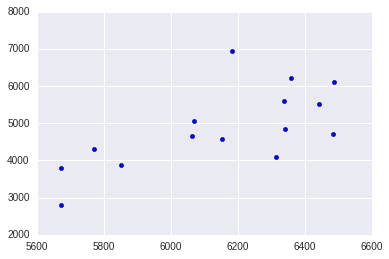

In [38]:
R2(dataset = ingresoXComuna,real = 'ingresoEncuesta',predicted = 'jobsAndSchoolYrooms')

1.8134632515764395

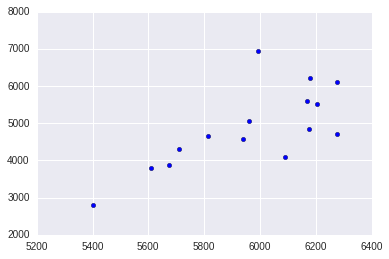

In [40]:
R2(dataset = ingresoXComuna,real = 'ingresoEncuesta',predicted = 'jobsAndSchool')

2.9263175703317885

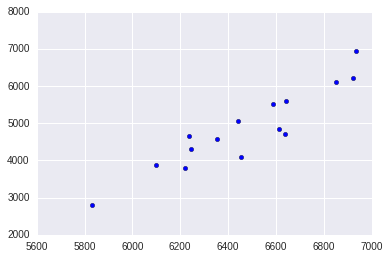

In [41]:
R2(dataset = ingresoXComuna,real = 'ingresoEncuesta',predicted = 'educHeadYjobsYrooms')

0.7354646108728816

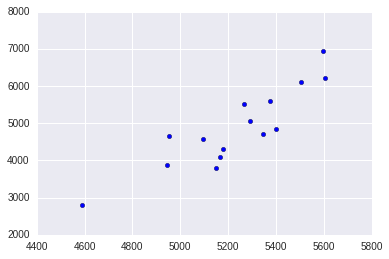

In [42]:
R2(dataset = ingresoXComuna,real = 'ingresoEncuesta',predicted = 'educHeadYjobs')

0.5408951985028208

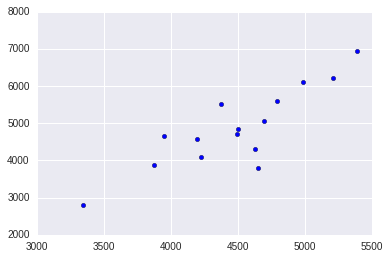

In [43]:
R2(dataset = ingresoXComuna,real = 'ingresoEncuesta',predicted = 'educHead')

In [44]:
ingresoXComuna.corr()

,educHead,ingresoEncuesta,educHeadYjobs,educHeadYjobsYrooms,jobsAndSchool,jobsAndSchoolYrooms
educHead,1.000000,0.852916,0.945786,0.868302,0.582601,0.453320
ingresoEncuesta,0.852916,1.000000,0.887309,0.930352,0.719773,0.678700
educHeadYjobs,0.945786,0.887309,1.000000,0.962413,0.796443,0.691391
educHeadYjobsYrooms,0.868302,0.930352,0.962413,1.000000,0.864166,0.813481
jobsAndSchool,0.582601,0.719773,0.796443,0.864166,1.000000,0.976802
jobsAndSchoolYrooms,0.453320,0.678700,0.691391,0.813481,0.976802,1.000000


# Si usamos el correlation coeficient el que mejor da es educHeadYjobsYrooms. 96%